# <center>Kiss Dániel Márk</center>
## <center>WP871Q</center>

# Library import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score

# Data import

In [2]:
df_verseny_public_train = pd.read_csv('data/verseny_public_train.csv', sep=',', low_memory=False)

# Data familirsation

In [3]:
df_verseny_public_train

,cookie_id,Topic1_ic,Topic1_ec,Topic2_ic,Topic2_ec,Topic3_ic,Topic3_ec,Topic4_ic,Topic4_ec,Topic5_ic,...,Topic177_ec,Topic178_ic,Topic178_ec,Topic179_ic,Topic179_ec,Topic180_ic,Topic180_ec,Topic181_ic,Topic181_ec,target
0,100000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,8,57,0,0,15,43,0,...,0,0,0,0,0,0,0,0,0,0
2,100002,0,0,0,0,8,50,8,50,0,...,0,0,0,0,0,0,0,0,0,0
3,100003,15,15,8,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100004,0,0,8,15,0,0,15,15,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,0,0,0,0,127,1,8,1,22,...,0,0,0,0,0,0,0,0,0,0
99996,199996,50,8,0,0,57,1,50,8,50,...,0,0,0,0,0,0,0,0,0,0
99997,199997,15,127,0,0,22,1,71,120,8,...,0,0,0,0,0,0,0,0,0,0
99998,199998,8,8,0,0,43,1,8,64,8,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_verseny_public_train.describe()

,cookie_id,Topic1_ic,Topic1_ec,Topic2_ic,Topic2_ec,Topic3_ic,Topic3_ec,Topic4_ic,Topic4_ec,Topic5_ic,...,Topic177_ec,Topic178_ic,Topic178_ec,Topic179_ic,Topic179_ec,Topic180_ic,Topic180_ec,Topic181_ic,Topic181_ec,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.000000
mean,149999.500000,8.798000,16.085980,1.066320,7.923940,19.105870,8.563590,15.600520,23.712400,4.927330,...,0.002190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015000
std,28867.657797,23.308133,48.515646,5.824816,50.279646,42.710725,40.371399,31.981042,54.356458,17.719046,...,0.501804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121553
min,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,124999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,149999.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,174999.250000,8.000000,8.000000,0.000000,0.000000,22.000000,1.000000,15.000000,22.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,199999.000000,477.000000,1548.000000,610.000000,1576.000000,631.000000,1506.000000,603.000000,1632.000000,512.000000,...,134.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [5]:
df_verseny_public_train.columns

Index(['cookie_id', 'Topic1_ic', 'Topic1_ec', 'Topic2_ic', 'Topic2_ec',
       'Topic3_ic', 'Topic3_ec', 'Topic4_ic', 'Topic4_ec', 'Topic5_ic',
       ...
       'Topic177_ec', 'Topic178_ic', 'Topic178_ec', 'Topic179_ic',
       'Topic179_ec', 'Topic180_ic', 'Topic180_ec', 'Topic181_ic',
       'Topic181_ec', 'target'],
      dtype='object', length=258)

# Feature importance

## Decision Tree

Feature ranking:
1. Feature 59 (0.037111) Topic42_ec
2. Feature 17 (0.034981) Topic12_ec
3. Feature 68 (0.029010) Topic55_ic
4. Feature 82 (0.028410) Topic63_ic
5. Feature 83 (0.028204) Topic63_ec
6. Feature 7 (0.023708) Topic4_ec
7. Feature 61 (0.021971) Topic51_ec
8. Feature 6 (0.019984) Topic4_ic
9. Feature 21 (0.019679) Topic14_ec
10. Feature 19 (0.018241) Topic13_ec
11. Feature 66 (0.017976) Topic54_ic
12. Feature 16 (0.017692) Topic12_ic
13. Feature 28 (0.017398) Topic19_ic
14. Feature 70 (0.017048) Topic56_ic
15. Feature 67 (0.016411) Topic54_ec
16. Feature 69 (0.015751) Topic55_ec
17. Feature 29 (0.015610) Topic19_ec
18. Feature 135 (0.015349) Topic99_ec
19. Feature 63 (0.014529) Topic52_ec
20. Feature 71 (0.013731) Topic56_ec
21. Feature 4 (0.013659) Topic3_ic
22. Feature 18 (0.013145) Topic13_ic
23. Feature 11 (0.012602) Topic8_ec
24. Feature 14 (0.011953) Topic10_ic
25. Feature 15 (0.011631) Topic10_ec
26. Feature 20 (0.011574) Topic14_ic
27. Feature 131 (0.011243) Topic97_e

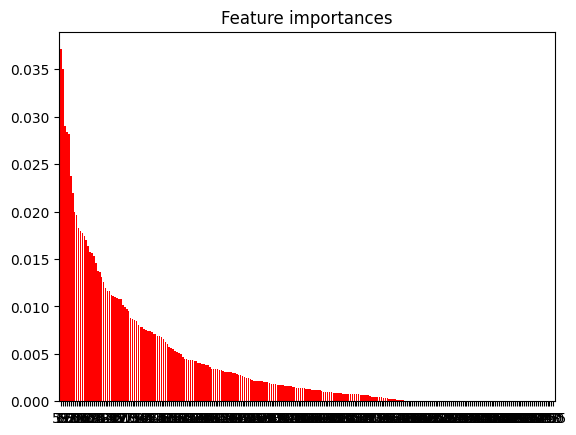

In [6]:
X = df_verseny_public_train.drop(['target', 'cookie_id'], axis=1)
y = df_verseny_public_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X.columns[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Random forest

Feature ranking:
1. Feature 7 (0.025461) Topic4_ec
2. Feature 68 (0.023729) Topic55_ic
3. Feature 17 (0.022298) Topic12_ec
4. Feature 82 (0.022257) Topic63_ic
5. Feature 19 (0.022080) Topic13_ec
6. Feature 6 (0.021378) Topic4_ic
7. Feature 21 (0.021182) Topic14_ec
8. Feature 83 (0.020718) Topic63_ec
9. Feature 16 (0.020655) Topic12_ic
10. Feature 20 (0.020602) Topic14_ic
11. Feature 18 (0.019739) Topic13_ic
12. Feature 70 (0.019649) Topic56_ic
13. Feature 71 (0.019346) Topic56_ec
14. Feature 59 (0.018971) Topic42_ec
15. Feature 69 (0.016966) Topic55_ec
16. Feature 4 (0.016783) Topic3_ic
17. Feature 66 (0.016030) Topic54_ic
18. Feature 67 (0.015867) Topic54_ec
19. Feature 61 (0.015676) Topic51_ec
20. Feature 28 (0.014671) Topic19_ic
21. Feature 29 (0.014352) Topic19_ec
22. Feature 1 (0.011712) Topic1_ec
23. Feature 35 (0.011653) Topic24_ec
24. Feature 12 (0.011648) Topic9_ic
25. Feature 22 (0.011296) Topic15_ic
26. Feature 14 (0.010941) Topic10_ic
27. Feature 87 (0.010605) Topic65_ec
28

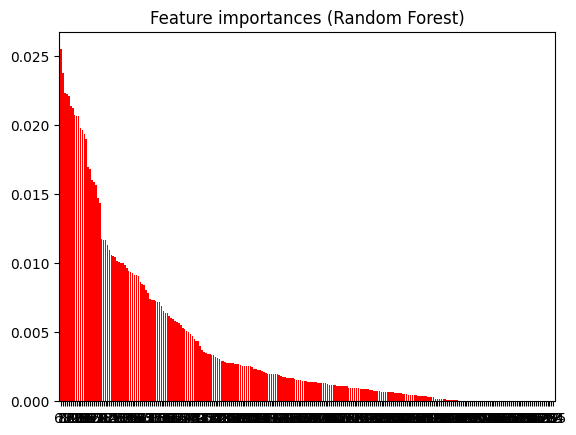

In [7]:
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)


importances_rf = clf_rf.feature_importances_


indices_rf = np.argsort(importances_rf)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]], X.columns[indices_rf[f]]))

plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(X.shape[1]), importances_rf[indices_rf],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices_rf)
plt.xlim([-1, X.shape[1]])
plt.show()

In [8]:
# Create DataFrames for feature importances
dt_feature_importances = pd.DataFrame({'Feature': indices, 'Importance_DT': importances[indices]})
rf_feature_importances = pd.DataFrame({'Feature': indices_rf, 'Importance_RF': importances_rf[indices_rf]})

# Merge DataFrames on the 'Feature' column
merged_feature_importances = pd.merge(dt_feature_importances, rf_feature_importances, on='Feature')

print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
     Feature  Importance_DT  Importance_RF
0         59       0.037111   1.897100e-02
1         17       0.034981   2.229798e-02
2         68       0.029010   2.372865e-02
3         82       0.028410   2.225695e-02
4         83       0.028204   2.071752e-02
..       ...            ...            ...
251      217       0.000000   0.000000e+00
252      218       0.000000   0.000000e+00
253      219       0.000000   0.000000e+00
254      220       0.000000   1.360346e-08
255      255       0.000000   0.000000e+00

[256 rows x 3 columns]


In [9]:
percentile_threshold = 0.8

importance_threshold_dt = merged_feature_importances['Importance_DT'].quantile(percentile_threshold)
importance_threshold_rf = merged_feature_importances['Importance_RF'].quantile(percentile_threshold)

print("Threshold value based on the top", int(percentile_threshold * 100), "percentileDT:", importance_threshold_dt, "percentileRF:", importance_threshold_rf)


Threshold value based on the top 80 percentileDT: 0.006894269178622717 percentileRF: 0.007154144637737518


In [10]:
merged_feature_importances = merged_feature_importances[(merged_feature_importances['Importance_DT'] > importance_threshold_dt) & (merged_feature_importances['Importance_RF'] > importance_threshold_rf)]
print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
    Feature  Importance_DT  Importance_RF
0        59       0.037111       0.018971
1        17       0.034981       0.022298
2        68       0.029010       0.023729
3        82       0.028410       0.022257
4        83       0.028204       0.020718
5         7       0.023708       0.025461
6        61       0.021971       0.015676
7         6       0.019984       0.021378
8        21       0.019679       0.021182
9        19       0.018241       0.022080
10       66       0.017976       0.016030
11       16       0.017692       0.020655
12       28       0.017398       0.014671
13       70       0.017048       0.019649
14       67       0.016411       0.015867
15       69       0.015751       0.016966
16       29       0.015610       0.014352
17      135       0.015349       0.007423
18       63       0.014529       0.009876
19       71       0.013731       0.019346
20        4       0.013659       0.016783
21       18       0.013145       0.019739
22    

In [11]:
X = X.drop(X.columns.difference(X.columns[merged_feature_importances['Feature']]), axis=1)


In [12]:
len(X.columns)

44

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell building - Random forest and AdaBoost with Voting

In [14]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

# Define base classifiers
base_rf = RandomForestClassifier(n_jobs=-1, n_estimators=150, max_depth=12, random_state=42, criterion='entropy', max_features='log2', oob_score=True, verbose=1)
base_ada = AdaBoostClassifier(n_estimators=150, random_state=42, learning_rate=1.2)

# Create the VotingClassifier with majority voting
voting_clf = VotingClassifier(estimators=[('rf', base_rf), ('ada', base_ada)], voting='soft', verbose=True)

# Fit the VotingClassifier on the training data
voting_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_voting = voting_clf.predict(X_test)

# Calculate accuracy
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Accuracy (Voting Classifier):", accuracy_voting)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.5s finished


[Voting] ....................... (1 of 2) Processing rf, total=   6.7s


/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[Voting] ...................... (2 of 2) Processing ada, total=  16.9s


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.1s finished


Accuracy (Voting Classifier): 0.98525


# Test set

In [15]:
df_verseny_public_test = pd.read_csv('data/verseny_public_test.csv', sep=',', low_memory=False)

# Random forest

In [16]:
X_test_test = df_verseny_public_test.drop(['cookie_id'], axis=1)

X_test_test = X_test_test.drop(X_test_test.columns.difference(X.columns), axis=1)

y_pred_rf = voting_clf.predict_proba(X_test_test)[:, 1]

df_verseny_public_test['target'] = y_pred_rf

df_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]

df_verseny_public_test.to_csv('data/prediction_random_forest_w_adaboost_voting_80_param.csv', index=False)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.3s finished
